In [1]:
"""
from bsccm import download_dataset
dataset_path = download_dataset('./', tiny=True)
print('Downloaded dataset to ' + dataset_path)
"""

"\nfrom bsccm import download_dataset\ndataset_path = download_dataset('./', tiny=True)\nprint('Downloaded dataset to ' + dataset_path)\n"

In [2]:
from bsccm import BSCCM
import numpy as np
import matplotlib.pyplot as plt

dataset_path = './BSCCM-tiny'

dataset = BSCCM(dataset_path)

Opening BSCCM-tiny
Opened BSCCM-tiny


In [3]:


def get_image_datatypes(dataset):
    datatypes = set()
    
    for index in dataset.get_indices():
        # Assuming dataset.read_image() returns a numpy array
        img = dataset.read_image(index, channel = 'Fluor_690-')
        
        if img is not None:
            datatypes.add(str(img.dtype))
    
    return list(datatypes)

image_datatypes = get_image_datatypes(dataset)
print("Image datatypes in the dataset:", image_datatypes)

Image datatypes in the dataset: ['uint16']


In [4]:
valid_indices = dataset.get_indices()

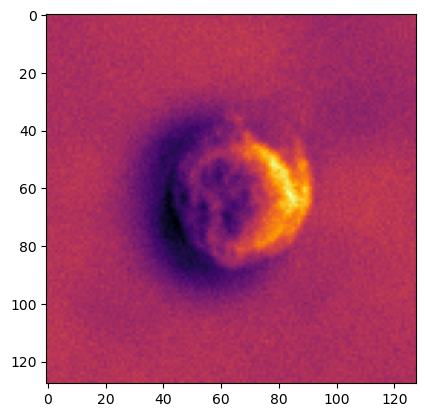

In [5]:
an_index = valid_indices[1]
image = dataset.read_image(an_index, channel='DPC_Left')
plt.imshow(image, cmap='inferno')

In [6]:
# Load the indices of the images and their labels (for the three class version)
indices, class_labels = dataset.get_cell_type_classification_data(ten_class_version=False)

def get_image_dimensions(dataset):
    dimensions = {}
    
    class_indices = indices[class_labels == 0]
    # Get the image at the current index
    img = dataset.read_image(np.random.choice(class_indices), channel='Brightfield')

    if img is not None:
        # Get the shape of the image
        if len(img.shape) == 3:
            y, x, _ = img.shape  # For color images
        else:
            y, x = img.shape  # For grayscale images

        dimensions[0] = (y, x)

    return dimensions



image_dimensions = get_image_dimensions(dataset)

# Print dimensions for each image
for index, (y, x) in image_dimensions.items():
    print(f"Image {index}: {y} rows x {x} columns")


Image 0: 128 rows x 128 columns


For all LED array images, the data are 128x128 pixels and have uint16 data type. However, they were collected on a 12 bit camera and thus have an intensity range from 0 to 4095.

Given below are 6 random 'Brightfield' images from te 3 class labels present in the dataset.

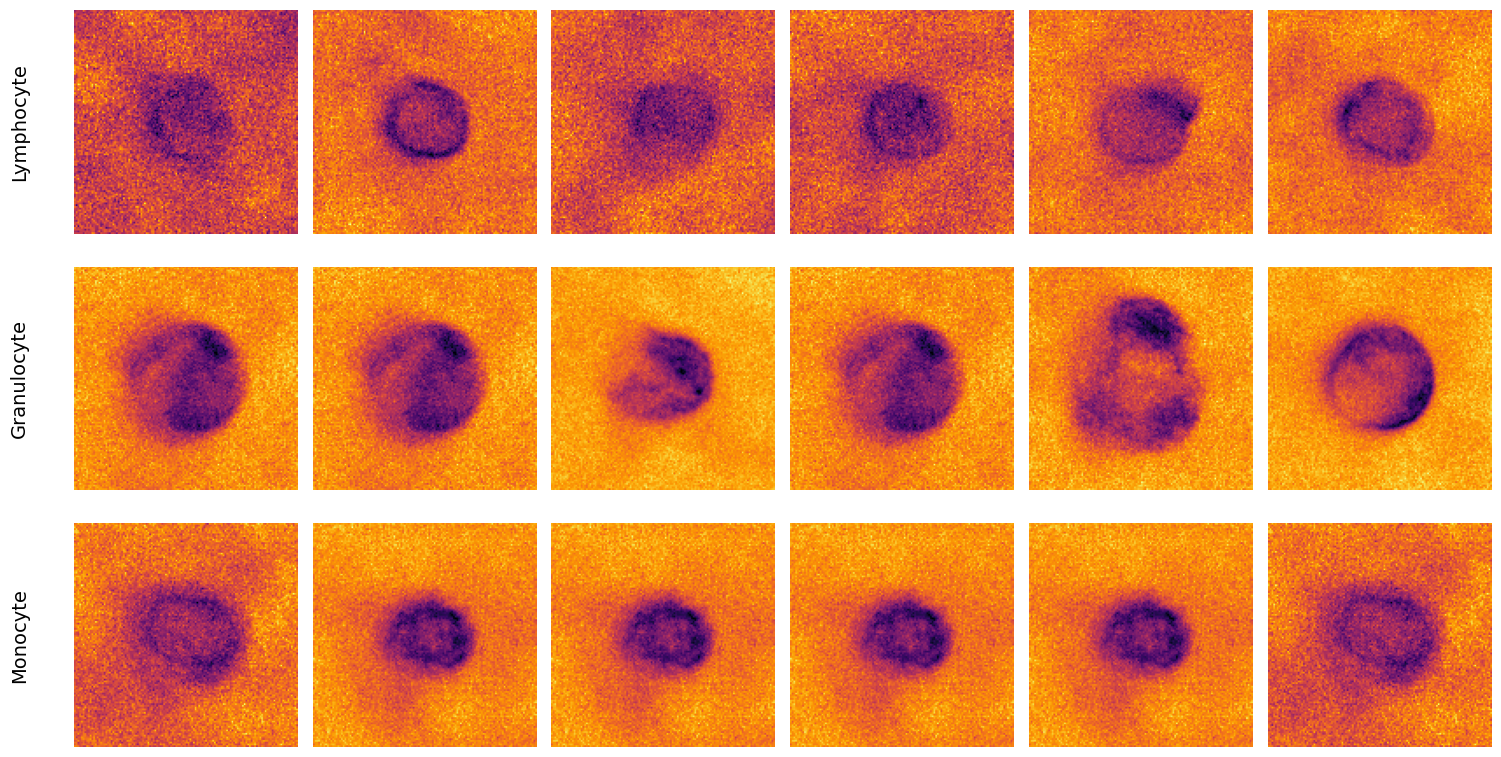

In [7]:
# Load the indices of the images and their labels (for the three class version)
indices, class_labels = dataset.get_cell_type_classification_data(ten_class_version=False)

# Show 6 examples of each class in three rows
fig, axs = plt.subplots(3, 6, figsize=(15, 8))
for i in range(3):
    for j in range(6):
        # Get the indices of the images in the current class
        class_indices = indices[class_labels == i]
        # Get the image at the current index
        image = dataset.read_image(np.random.choice(class_indices), channel='Brightfield')
        # Plot the image in the corresponding subplot
        axs[i, j].imshow(image, cmap='inferno')
        axs[i, j].axis('off')
# Add label
for i, label in enumerate(['Lymphocyte', 'Granulocyte', 'Monocyte']):
    axs[i, 0].text(-0.2, 0.5, label, fontsize=14, ha='right', va='center', transform=axs[i, 0].transAxes, rotation=90)

plt.tight_layout()

Fluorescence, which depending on the the sub-dataset either measures the light coming from one or more surface markers, or the cell's autofluorescence. This raw data can be processed to make more information measurements of surface marker expression

In [8]:
print('Fluorescence channels:')
channel_names = ['Brightfield']
for name in dataset.global_metadata['fluorescence']['channel_names']:
    channel_names.append(name)
    print(name)

Fluorescence channels:
Fluor_690-
Fluor_627-673
Fluor_585-625
Fluor_550-570
Fluor_500-550
Fluor_426-446


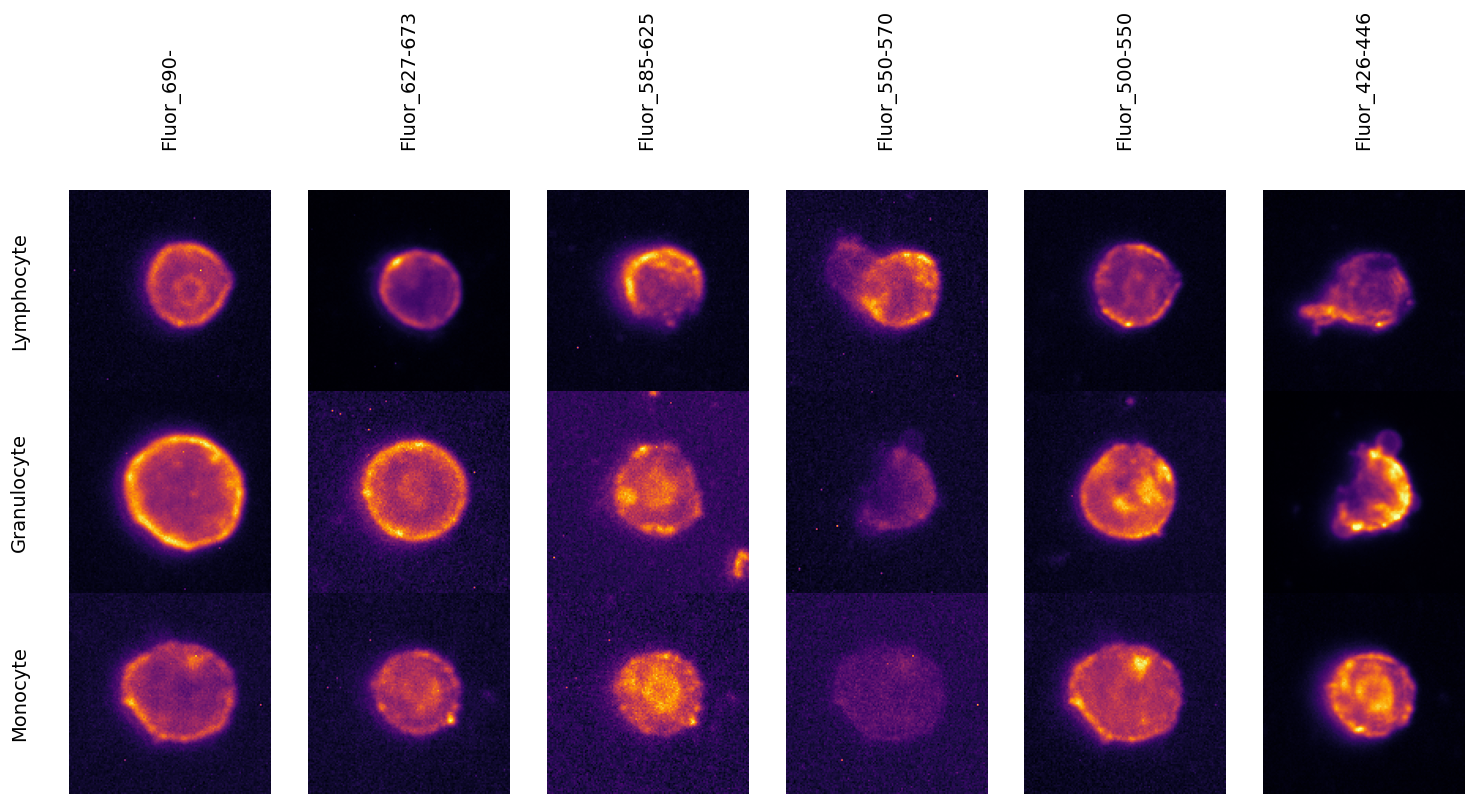

In [9]:
# Load the indices of the images and their labels (for the three class version)
indices, class_labels = dataset.get_cell_type_classification_data(ten_class_version=False)

# Show 6 examples of each class in three rows
fig, axs = plt.subplots(3, 6, figsize=(15, 8))
for i in range(3):
    # Get the indices of the images in the current class
    class_indices = indices[class_labels == i]
    # Get the image at the current index
    image_channel1 = dataset.read_image(np.random.choice(class_indices), channel='Fluor_690-')
    image_channel2 = dataset.read_image(np.random.choice(class_indices), channel='Fluor_627-673')
    image_channel3 = dataset.read_image(np.random.choice(class_indices), channel='Fluor_585-625')
    image_channel4 = dataset.read_image(np.random.choice(class_indices), channel='Fluor_550-570')
    image_channel5 = dataset.read_image(np.random.choice(class_indices), channel='Fluor_500-550')
    image_channel6 = dataset.read_image(np.random.choice(class_indices), channel='Fluor_426-446')
    # Plot the image in the corresponding subplot
    axs[i, 0].imshow(image_channel1, cmap='inferno')
    axs[i, 0].axis('off')
    axs[i, 1].imshow(image_channel2, cmap='inferno')
    axs[i, 1].axis('off')
    axs[i, 2].imshow(image_channel3, cmap='inferno')
    axs[i, 2].axis('off')
    axs[i, 3].imshow(image_channel4, cmap='inferno')
    axs[i, 3].axis('off')
    axs[i, 4].imshow(image_channel5, cmap='inferno')
    axs[i, 4].axis('off')
    axs[i, 5].imshow(image_channel6, cmap='inferno')
    axs[i, 5].axis('off')
# Add label
for i, label in enumerate(['Lymphocyte', 'Granulocyte', 'Monocyte']):
    axs[i, 0].text(-0.2, 0.5, label, fontsize=14, ha='right', va='center', transform=axs[i, 0].transAxes, rotation=90)
    
for j, label in enumerate(['Fluor_690-', 'Fluor_627-673', 'Fluor_585-625', 'Fluor_550-570', 'Fluor_500-550', 'Fluor_426-446']):
    axs[0,j].text(0.5, 1.2, label, fontsize=14, ha = 'center', va='bottom', transform = axs[0,j].transAxes, rotation=90)

plt.tight_layout()

**Number of Images in each channel**

Global metadata also contains a bunch of other useful information like pixel size, exposure, etc

In [10]:
import os
import cv2
import numpy as np

def count_images_by_channel(dataset, target_channel):
    count = 0
    for index in valid_indices:
            img = dataset.read_image(index, channel = target_channel)
            
            if img is not None:
                count += 1
    
    return count

for target_channel in dataset.global_metadata['fluorescence']['channel_names']:
    total_images = count_images_by_channel(dataset, target_channel)
    print(f"Total number of images in channel {target_channel}: {total_images}")

Total number of images in channel Fluor_690-: 1000
Total number of images in channel Fluor_627-673: 1000
Total number of images in channel Fluor_585-625: 1000
Total number of images in channel Fluor_550-570: 1000
Total number of images in channel Fluor_500-550: 1000
Total number of images in channel Fluor_426-446: 1000


In [11]:
for key in dataset.global_metadata['led_array'].keys():
    print(key)
    
print('The illumination wavelength is: {} nm'.format(dataset.global_metadata['led_array']['wavelength_nm']))

channel_names
channel_indices
exposure_ms
wavelength_nm
pixel_size_um
objective
The illumination wavelength is: 515 nm


In [12]:
print('The pixel size of images are: {}'.format(dataset.global_metadata['fluorescence']['pixel_size_um']))

The pixel size of images are: 0.166


In [13]:
dataset.global_metadata

{'name': 'BSCCM-tiny',
 'led_array': {'channel_names': ['Brightfield',
   'DF_50',
   'DF_50_Bottom',
   'DF_50_Right',
   'DF_55',
   'DF_60',
   'DF_60_Bottom',
   'DF_60_Right',
   'DF_65',
   'DF_70',
   'DF_70_Bottom',
   'DF_70_Right',
   'DF_75',
   'DF_80',
   'DF_80_Bottom',
   'DF_80_Right',
   'DF_85',
   'DF_90',
   'DPC_Bottom',
   'DPC_Left',
   'DPC_Right',
   'DPC_Top',
   'LED119'],
  'channel_indices': {'Brightfield': 0,
   'DF_50': 1,
   'DF_50_Bottom': 2,
   'DF_50_Right': 3,
   'DF_55': 4,
   'DF_60': 5,
   'DF_60_Bottom': 6,
   'DF_60_Right': 7,
   'DF_65': 8,
   'DF_70': 9,
   'DF_70_Bottom': 10,
   'DF_70_Right': 11,
   'DF_75': 12,
   'DF_80': 13,
   'DF_80_Bottom': 14,
   'DF_80_Right': 15,
   'DF_85': 16,
   'DF_90': 17,
   'DPC_Bottom': 18,
   'DPC_Left': 19,
   'DPC_Right': 20,
   'DPC_Top': 21,
   'LED119': 22},
  'exposure_ms': {'Brightfield': 8,
   'DF_50': 29,
   'DF_50_Bottom': 58,
   'DF_50_Right': 58,
   'DF_55': 46,
   'DF_60': 62,
   'DF_60_Bottom'

In [14]:
for key in dataset.global_metadata.keys():
    print(key)

name
led_array
fluorescence
histology


In [15]:

# Show the surface_marker_dataframe dataframe
surface_marker_df = dataset.surface_marker_dataframe
dataset.surface_marker_dataframe

Fluor_690-_total_raw  Fluor_690-_background  \
global_index                                                
30                       80.280174              74.017822   
281                      84.439026              73.766899   
307                      83.524712              79.544556   
584                      76.998756              73.875816   
1451                     77.841934              75.459969   
...                            ...                    ...   
410573                   75.203903              73.607918   
411302                   71.616470              70.108345   
411912                   72.948479              71.917114   
412320                   67.802551              66.449791   
412676                   78.895248              75.465630   

              Fluor_627-673_total_raw  Fluor_627-673_background  \
global_index                                                      
30                          92.825745                 82.036209   
281                         96.709938                 82.201134   
307                        104.874077                 97.363228   
584                        100.921631                 93.973412   
1451                       106.318001                100.236778   
...                               ...                       ...   
410573                      76.442604                 71.296745   
411302                      79.173630                 73.205658   
411912                      73.403297                 69.991234   
412320                      75.414505                 70.495331   
412676                      82.607048                 73.476944   

              Fluor_585-625_total_raw  Fluor_585-625_background  \
global_index                                                      
30                          78.291771                 68.508064   
281                         83.121490                 72.188400   
307                         94.569847                 86.727585   
584                         85.801308                 79.386421   
1451                        95.188652                 88.820366   
...                               ...                       ...   
410573                      64.858589                 59.111740   
411302                      62.052612                 55.347382   
411912                      62.044205                 58.000565   
412320                      66.003502                 60.283451   
412676                      70.389755                 60.524471   

              Fluor_550-570_total_raw  Fluor_550-570_background  \
global_index                                                      
30                          53.840534                 51.594341   
281                         55.668068                 53.734089   
307                         60.379017                 58.560394   
584                         62.139389                 60.737484   
1451                        58.627598                 56.944553   
...                               ...                       ...   
410573                      54.230991                 52.704102   
411302                      56.207485                 54.568600   
411912                      53.103512                 51.872417   
412320                      53.788311                 52.431118   
412676                      58.157677                 55.653465   

              Fluor_500-550_total_raw  Fluor_500-550_background  ...  \
global_index                                                     ...   
30                         122.134407                105.219803  ...   
281                        122.852676                107.512589  ...   
307                        145.880920                132.351624  ...   
584                        134.319244                123.203392  ...   
1451                       145.752975                135.340027  ...   
...                               ...                       ...  ...   
410573                      

In [16]:
surface_marker_df.reset_index()

global_index  Fluor_690-_total_raw  Fluor_690-_background  \
0              30             80.280174              74.017822   
1             281             84.439026              73.766899   
2             307             83.524712              79.544556   
3             584             76.998756              73.875816   
4            1451             77.841934              75.459969   
..            ...                   ...                    ...   
995        410573             75.203903              73.607918   
996        411302             71.616470              70.108345   
997        411912             72.948479              71.917114   
998        412320             67.802551              66.449791   
999        412676             78.895248              75.465630   

     Fluor_627-673_total_raw  Fluor_627-673_background  \
0                  92.825745                 82.036209   
1                  96.709938                 82.201134   
2                 104.874077                 97.363228   
3                 100.921631                 93.973412   
4                 106.318001                100.236778   
..                       ...                       ...   
995                76.442604                 71.296745   
996                79.173630                 73.205658   
997                73.403297                 69.991234   
998                75.414505                 70.495331   
999                82.607048                 73.476944   

     Fluor_585-625_total_raw  Fluor_585-625_background  \
0                  78.291771                 68.508064   
1                  83.121490                 72.188400   
2                  94.569847                 86.727585   
3                  85.801308                 79.386421   
4                  95.188652                 88.820366   
..                       ...                       ...   
995                64.858589                 59.111740   
996                62.052612                 55.347382   
997                62.044205                 58.000565   
998                66.003502                 60.283451   
999                70.389755                 60.524471   

     Fluor_550-570_total_raw  Fluor_550-570_background  \
0                  53.840534                 51.594341   
1                  55.668068                 53.734089   
2                  60.379017                 58.560394   
3                  62.139389                 60.737484   
4                  58.627598                 56.944553   
..                       ...                       ...   
995                54.230991                 52.704102   
996                56.207485                 54.568600   
997                53.103512                 51.872417   
998                53.788311                 52.431118   
999                58.157677                 55.653465   

     Fluor_500-550_total_raw  ...  selection_gated_CD3_hi_CD_16_lo  \
0                 122.134407  ...                            False   
1                 122.852676  ...                            False   
2                 145.880920  ...                            False   
3                 134.319244  ...                            False   
4                 145.752975  ...                            False   
..                       ...  ...                              ...   
995                97.927544  ...                            False   
996               102.358704  ...                            False   
997                95.794693  ...                            False   
998               105.068413  ...                            False   
999               108.385086  ...                            False   

     selection_gated_CD16_hi_CD45_mid  selection_gated_CD16_hi_CD45_lomid  \
0                               False                               False   
1                               False                               False   
2                               False            

This dataframe contains many columns, including raw fluorescence measurements, shading-corrected fluorescence (i.e. corrected for position in field of view), demixed surface marker measurements, and many intermediates used in this processing. Here, we highlight two particularly useful parts, the shading-corrected fluorescence, and the demixed surface marker estimates.

These can both be accessed with another two convenience functions, the first of which is:

In [17]:
has_surfacemarker_columns = surface_marker_df.keys()
has_surfacemarker_columns

Index(['Fluor_690-_total_raw', 'Fluor_690-_background',
       'Fluor_627-673_total_raw', 'Fluor_627-673_background',
       'Fluor_585-625_total_raw', 'Fluor_585-625_background',
       'Fluor_550-570_total_raw', 'Fluor_550-570_background',
       'Fluor_500-550_total_raw', 'Fluor_500-550_background',
       'Fluor_426-446_total_raw', 'Fluor_426-446_background',
       'Fluor_426-446_background_lowess', 'Fluor_500-550_background_lowess',
       'Fluor_550-570_background_lowess', 'Fluor_585-625_background_lowess',
       'Fluor_627-673_background_lowess', 'Fluor_690-_background_lowess',
       'Fluor_426_shading', 'Fluor_426-446_shading',
       'Fluor_426-446_shading_corrected', 'Fluor_500-550_shading',
       'Fluor_500-550_shading_corrected', 'Fluor_550-570_shading',
       'Fluor_550-570_shading_corrected', 'Fluor_585-625_shading',
       'Fluor_585-625_shading_corrected', 'Fluor_627-673_shading',
       'Fluor_627-673_shading_corrected', 'Fluor_690-_shading',
       'Fluor_690-_sh

In [18]:
# Get the indices of cells in batch 0 with no antibody stains
global_indices = dataset.get_indices(batch=0, antibodies='unstained')
fluor = dataset.get_corrected_fluor(global_indices)

Fluor is an N by 6 matrix, where N is the number of cells and 6 is the number of fluorescent channels. Since we specifically picked 'unstained' cells, this fluorescence corrsponds to the cell's inherent autofluorescence 

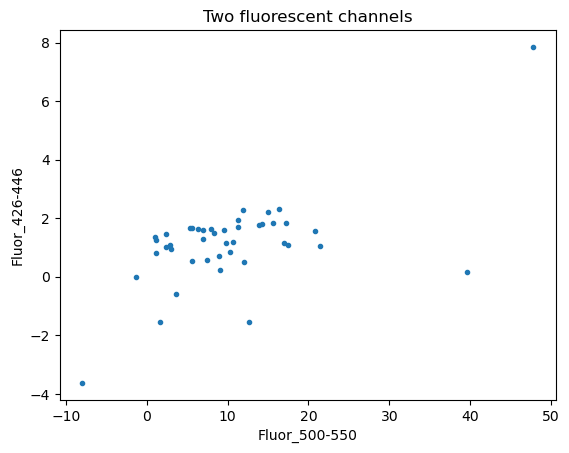

In [19]:
plt.plot(fluor[:, 4], fluor[:, 5], '.')
_ = plt.title('Two fluorescent channels')
_ = plt.xlabel(dataset.global_metadata['fluorescence']['channel_names'][4])
_ = plt.ylabel(dataset.global_metadata['fluorescence']['channel_names'][5])

# **Extracting the brightfield and fluorescence images alone and storing in a separate file**

In [20]:
import h5py
import numpy as np

def store_fluor_images(dataset, global_indices, fluor, output_file='fluor_images.h5'):
    with h5py.File(output_file, 'w') as f:
        num_images, num_channels = fluor.shape
        
        
        
        image_shape = (128, 128)  

        # Create a dataset for storing images
        images_dataset = f.create_dataset(
            'images',
            shape=(num_images, num_channels+1, *image_shape), # Number of channels is incremented by one to store the brightfield images
            dtype=np.uint16  # Use uint16 to match the original datatype
        )

        # Store the images in the HDF5 file
        for i, index in enumerate(global_indices):
            for j, name in enumerate(channel_names):
                # Read the image for the specific index and channel
                img = dataset.read_image(index, channel=name)
                
                # Ensure the image is in uint16 format
                img_uint16 = img.astype(np.uint16)
                
                # Store the image
                images_dataset[i, j] = img_uint16

        # Store metadata
        f.attrs['num_images'] = num_images
        f.attrs['num_channels'] = num_channels
        f.attrs['image_shape'] = image_shape
        f.attrs['datatype'] = 'uint16'

    print(f"All images have been stored in '{output_file}' with uint16 datatype")

# Usage
store_fluor_images(dataset, global_indices, fluor)

All images have been stored in 'fluor_images.h5' with uint16 datatype


Dataset contains 43 images with 7 channels each, of size 128x128.


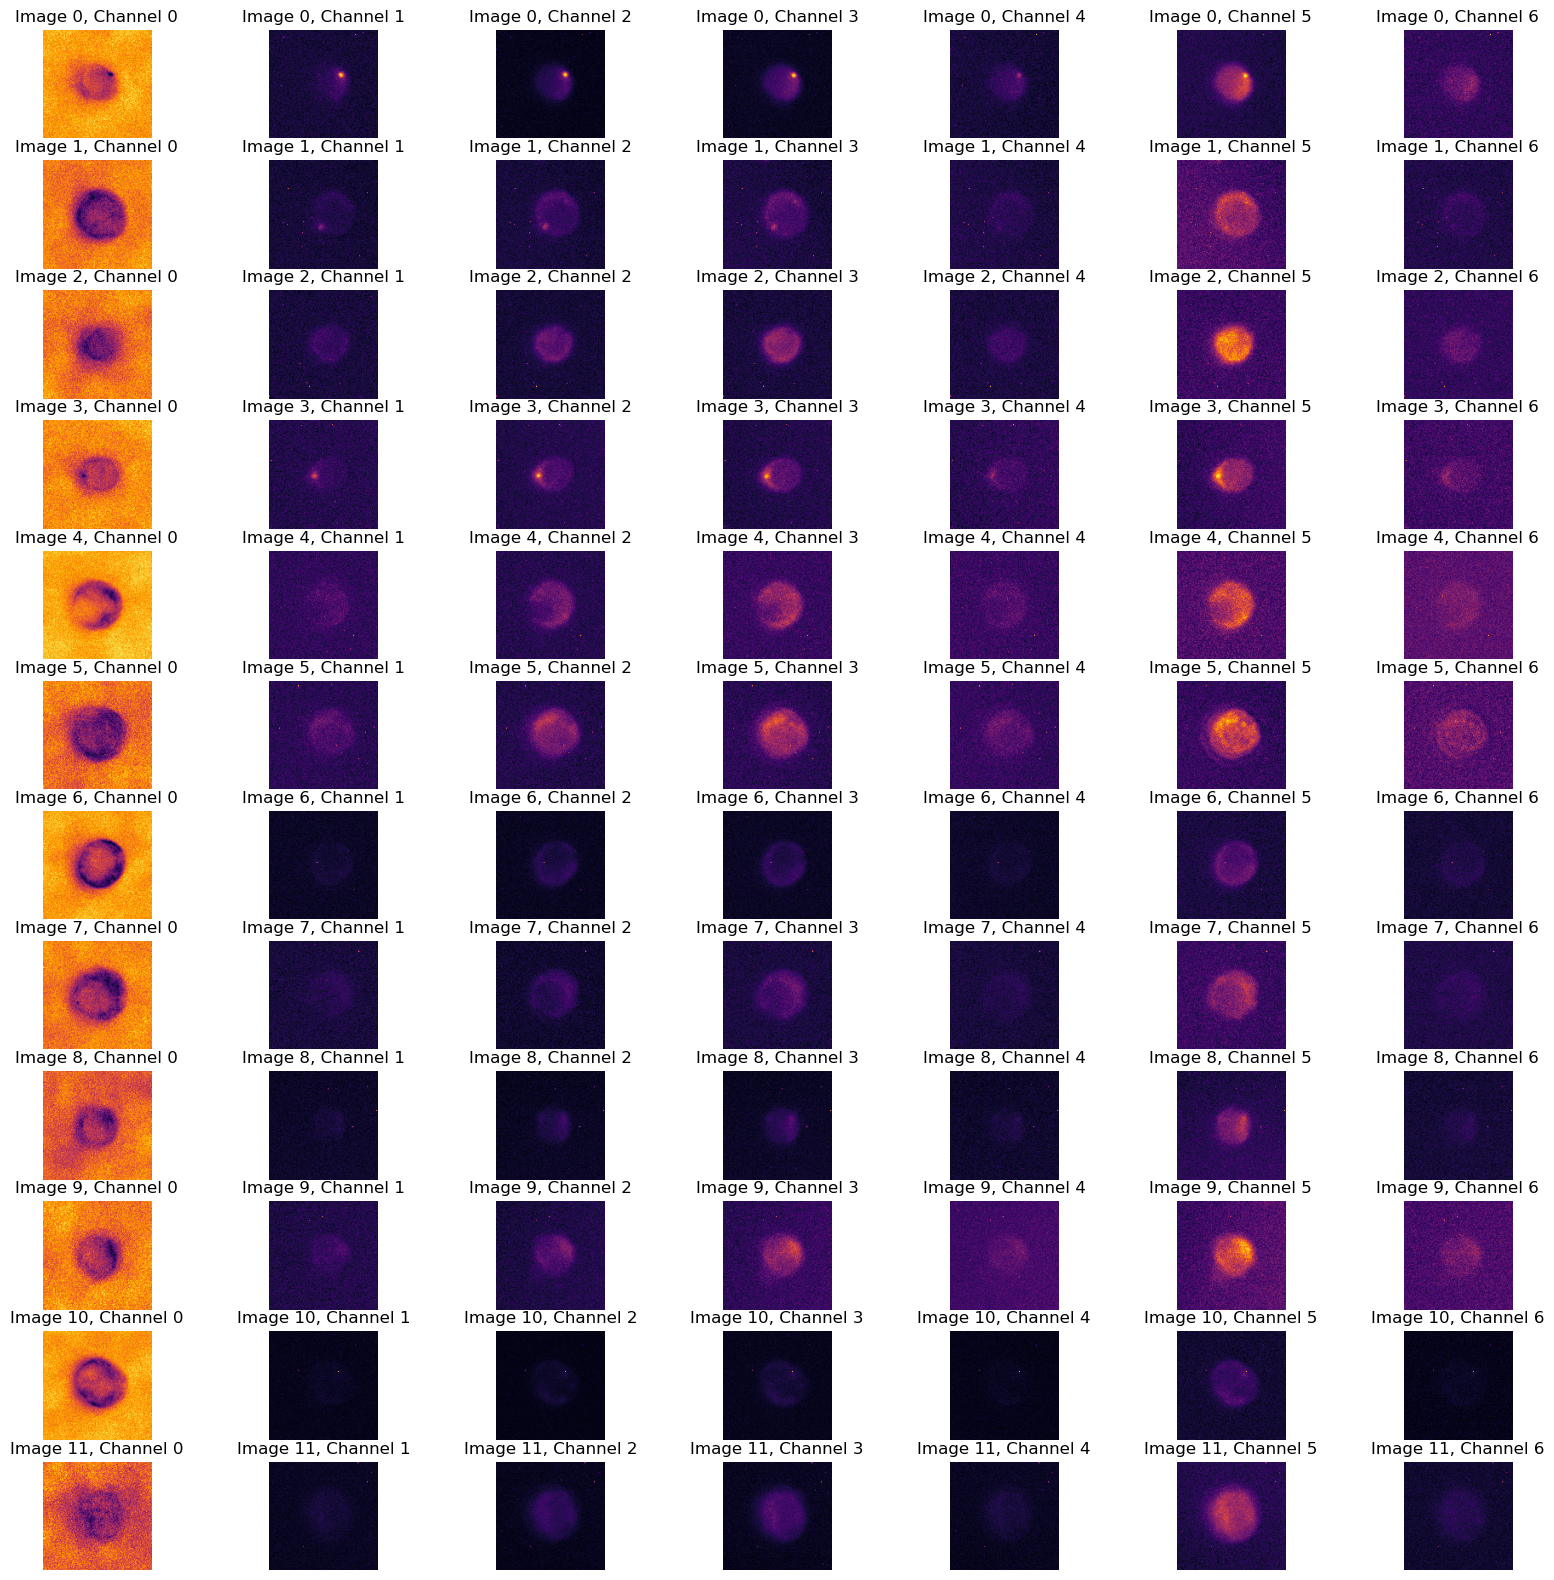

In [21]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

def display_images_from_hdf5(file_path, num_images_to_display=12):
    with h5py.File(file_path, 'r') as f:
        # Access the dataset
        images_dataset = f['images']
        num_images, num_channels, height, width = images_dataset.shape
        
        print(f"Dataset contains {num_images} images with {num_channels} channels each, of size {height}x{width}.")

        # Display the first few images
        plt.figure(figsize=(20, 20))
        for i in range(min(num_images_to_display, num_images)):
            for j in range(num_channels):
                img = images_dataset[i, j]
                plt.subplot(num_images_to_display, num_channels, i * num_channels + j + 1)
                plt.imshow(img, cmap='inferno')
                plt.title(f'Image {i}, Channel {j}')
                plt.axis('off')
        plt.show()

# Usage
file_path = 'fluor_images.h5'
display_images_from_hdf5(file_path)

# PatchGAN Discriminator

In [22]:
# example of defining a 70x70 patchgan discriminator model
from keras.optimizers import Adam
from keras.initializers import RandomNormal
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate
from keras.layers import BatchNormalization
#from keras.utils import plot_model

# define the discriminator model
def define_discriminator(image_shape):
    # weight initialization
    init = RandomNormal(stddev=0.02)
    # source image input
    in_src_image = Input(shape=image_shape)
    # target image input
    in_target_image = Input(shape=image_shape)
    # concatenate images channel-wise
    merged = Concatenate()([in_src_image, in_target_image])
    # C64
    d = Conv2D(64, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(merged)
    d = LeakyReLU(alpha=0.2)(d)
    # C128
    d = Conv2D(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
    d = BatchNormalization()(d)
    d = LeakyReLU(alpha=0.2)(d)
    # C256
    d = Conv2D(256, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
    d = BatchNormalization()(d)
    d = LeakyReLU(alpha=0.2)(d)
    # C512
    d = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
    d = BatchNormalization()(d)
    d = LeakyReLU(alpha=0.2)(d)
    # second last output layer
    d = Conv2D(512, (4,4), padding='same', kernel_initializer=init)(d)
    d = BatchNormalization()(d)
    d = LeakyReLU(alpha=0.2)(d)
    # patch output
    d = Conv2D(1, (4,4), padding='same', kernel_initializer=init)(d)
    patch_out = Activation('sigmoid')(d)
    # define model
    model = Model([in_src_image, in_target_image], patch_out)
    # compile model
    opt = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, loss_weights=[0.5])
    return model

# define image shape
image_shape = (256,256,3)
# create the model
model = define_discriminator(image_shape)
# summarize the model
model.summary()
# plot the model
#plot_model(model, to_file='discriminator_model_plot.png', show_shapes=True, show_layer_names=True)

/Users/anagharamadas/anaconda3/envs/GPU/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 256, 256,  │          0 │ input_layer[0][0… │
│ (Concatenate)       │ 6)                │            │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 128, 128,  │      6,208 │ concatenate[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu         │ (None, 128, 128,  │          0 │ conv2d[0][0]      │
│ (LeakyReLU)         │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 64, 64,    │    131,200 │ leaky_re_lu[0][0] │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 64, 64,    │        512 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_1       │ (None, 64, 64,    │          0 │ batch_normalizat… │
│ (LeakyReLU)         │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 32, 32,    │    524,544 │ leaky_re_lu_1[0]… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │      1,024 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_2       │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (LeakyReLU)         │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 16, 16,    │  2,097,664 │ leaky_re_lu_2[0]… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │      2,048 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_3       │ (None, 16, 16,    │          0 │ batch_normalizat… │
│ (LeakyReLU)         │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 16, 16,    │  4,194,816 │ leaky_re_lu_3[0]… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │      2,048 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_4       │ (None, 16, 16,    │          0 │ batch_normalizat

 Total params: 6,968,257 (26.58 MB)

 Trainable params: 6,965,441 (26.57 MB)

 Non-trainable params: 2,816 (11.00 KB)

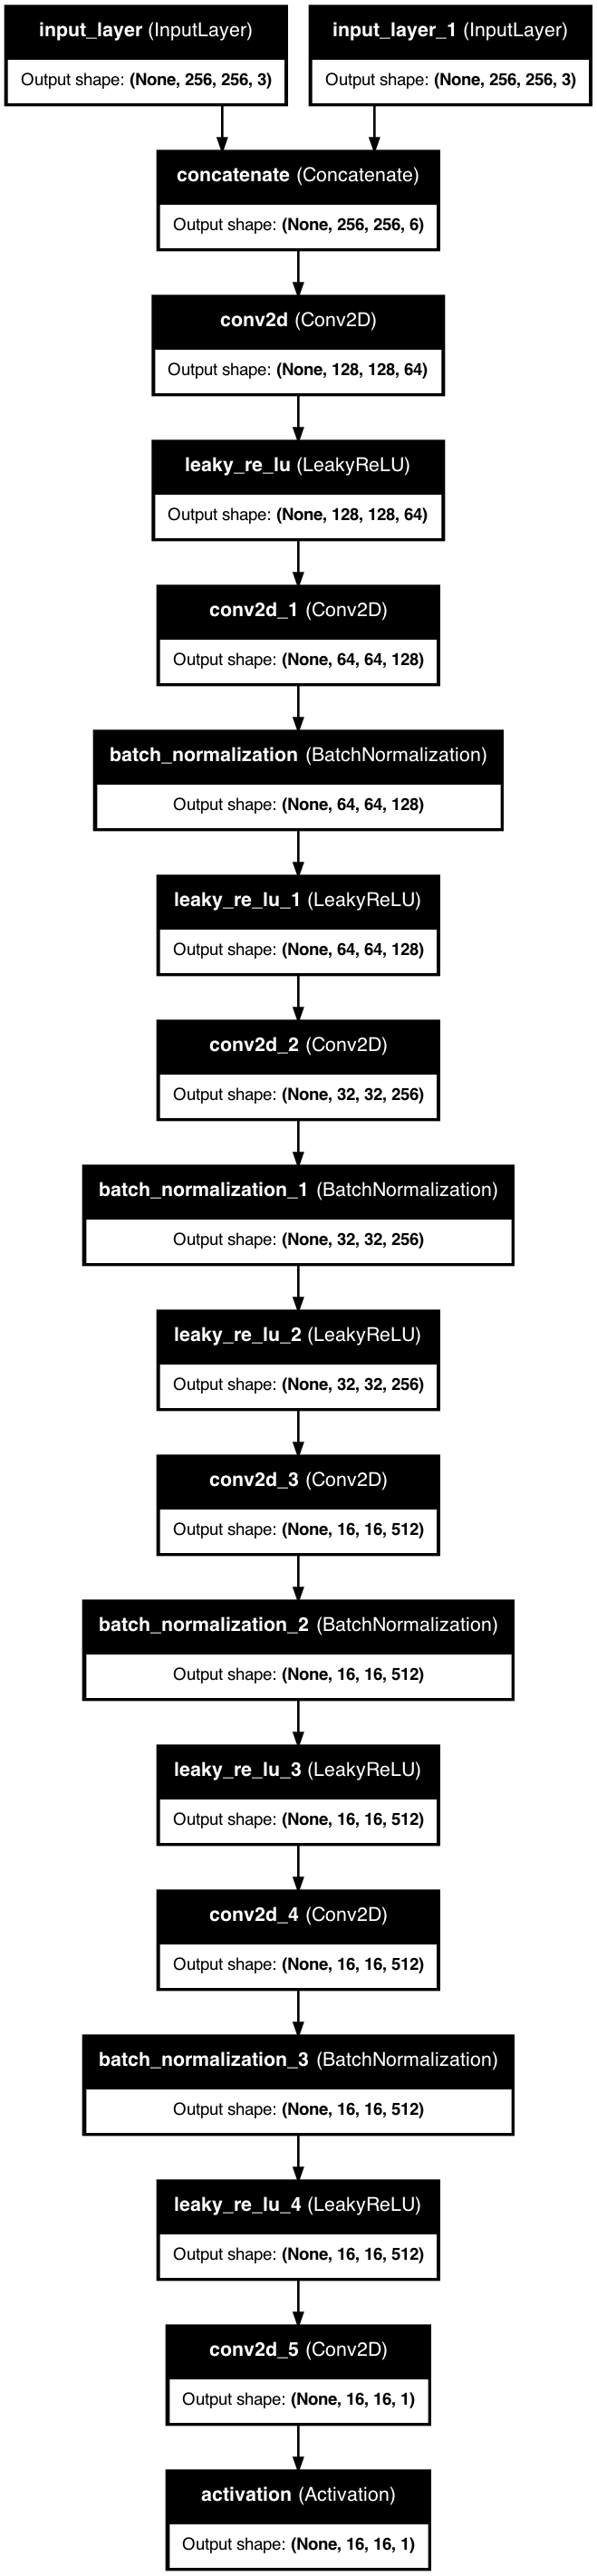

In [23]:
from tensorflow.keras.utils import plot_model
import tensorflow as tf

# After defining your model
tf.keras.utils.plot_model(
    model,
    to_file="discriminator_model_plot.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
)

# U-Net Generator

In [26]:
# example of defining a u-net encoder-decoder generator model
from keras.initializers import RandomNormal
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
#from keras.utils.vis_utils import plot_model

# define an encoder block
def define_encoder_block(layer_in, n_filters, batchnorm=True):
    # weight initialization
    init = RandomNormal(stddev=0.02)
    # add downsampling layer
    g = Conv2D(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
    # conditionally add batch normalization
    if batchnorm:
        g = BatchNormalization()(g, training=True)
    # leaky relu activation
    g = LeakyReLU(alpha=0.2)(g)
    return g

# define a decoder block
def decoder_block(layer_in, skip_in, n_filters, dropout=True):
    # weight initialization
    init = RandomNormal(stddev=0.02)
    # add upsampling layer
    g = Conv2DTranspose(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
    # add batch normalization
    g = BatchNormalization()(g, training=True)
    # conditionally add dropout
    if dropout:
        g = Dropout(0.5)(g, training=True)
    # merge with skip connection
    g = Concatenate()([g, skip_in])
    # relu activation
    g = Activation('relu')(g)
    return g

# define the standalone generator model
def define_generator(image_shape=(256,256,3)):
    # weight initialization
    init = RandomNormal(stddev=0.02)
    # image input
    in_image = Input(shape=image_shape)
    # encoder model: C64-C128-C256-C512-C512-C512-C512-C512
    e1 = define_encoder_block(in_image, 64, batchnorm=False)
    e2 = define_encoder_block(e1, 128)
    e3 = define_encoder_block(e2, 256)
    e4 = define_encoder_block(e3, 512)
    e5 = define_encoder_block(e4, 512)
    e6 = define_encoder_block(e5, 512)
    e7 = define_encoder_block(e6, 512)
    # bottleneck, no batch norm and relu
    b = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(e7)
    b = Activation('relu')(b)
    # decoder model: CD512-CD1024-CD1024-C1024-C1024-C512-C256-C128
    d1 = decoder_block(b, e7, 512)
    d2 = decoder_block(d1, e6, 512)
    d3 = decoder_block(d2, e5, 512)
    d4 = decoder_block(d3, e4, 512, dropout=False)
    d5 = decoder_block(d4, e3, 256, dropout=False)
    d6 = decoder_block(d5, e2, 128, dropout=False)
    d7 = decoder_block(d6, e1, 64, dropout=False)
    # output
    g = Conv2DTranspose(3, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d7)
    out_image = Activation('tanh')(g)
    # define model
    model = Model(in_image, out_image)
    return model

# define image shape
image_shape = (256,256,3)
# create the model
model = define_generator(image_shape)
# summarize the model
model.summary()
# plot the model
#plot_model(model, to_file='generator_model_plot.png', show_shapes=True, show_layer_names=True)

/Users/anagharamadas/anaconda3/envs/GPU/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 128, 128,  │      3,136 │ input_layer_2[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_5       │ (None, 128, 128,  │          0 │ conv2d_6[0][0]    │
│ (LeakyReLU)         │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 64, 64,    │    131,200 │ leaky_re_lu_5[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        512 │ conv2d_7[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_6       │ (None, 64, 64,    │          0 │ batch_normalizat… │
│ (LeakyReLU)         │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 32, 32,    │    524,544 │ leaky_re_lu_6[0]… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │      1,024 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_7       │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (LeakyReLU)         │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 16, 16,    │  2,097,664 │ leaky_re_lu_7[0]… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │      2,048 │ conv2d_9[0][0]    │
│ (BatchNormalizatio… │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_8       │ (None, 16, 16,    │          0 │ batch_normalizat… │
│ (LeakyReLU)         │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 8, 8, 512) │  4,194,816 │ leaky_re_lu_8[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 512) │      2,048 │ conv2d_10[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_9       │ (None, 8, 8, 512) │          0 │ batch_normalizat… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 4, 4, 512) │  4,194,816 │ leaky_re_lu_9[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 4, 4, 512) │      2,048 │ conv2d_11[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 54,429,315 (207.63 MB)

 Trainable params: 54,419,459 (207.59 MB)

 Non-trainable params: 9,856 (38.50 KB)

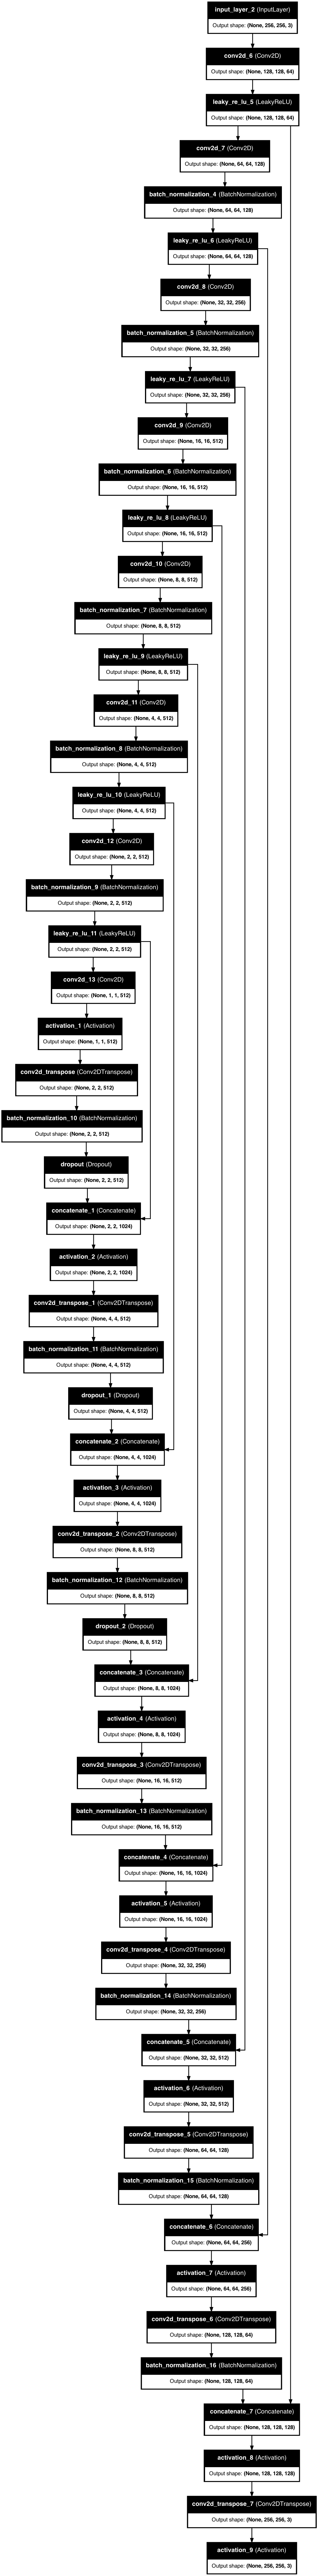

In [27]:
from tensorflow.keras.utils import plot_model
import tensorflow as tf

# After defining your model
tf.keras.utils.plot_model(
    model,
    to_file="generator_model_plot.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
)